# Sales Analysis

In [1]:
# importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import os

### 1. merging 12 months of data into a single file

In [1]:
files = [file for file in os.listdir('D:\Data Analytics\datasets\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    df = pd.read_csv("D:/Data Analytics/datasets/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
   all_months_data=pd.concat([all_months_data, df])
all_months_data.to_csv('full_data.csv',index=False)

### Read in updated dataframe

In [3]:
full_data=pd.read_csv('full_data.csv')
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
null_rows=full_data[full_data.isnull().any(axis=1)]
print(null_rows)

       Order ID Product Quantity Ordered Price Each Order Date  \
1           NaN     NaN              NaN        NaN        NaN   
356         NaN     NaN              NaN        NaN        NaN   
735         NaN     NaN              NaN        NaN        NaN   
1433        NaN     NaN              NaN        NaN        NaN   
1553        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185176      NaN     NaN              NaN        NaN        NaN   
185438      NaN     NaN              NaN        NaN        NaN   
186042      NaN     NaN              NaN        NaN        NaN   
186548      NaN     NaN              NaN        NaN        NaN   
186826      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
1                   NaN  
356                 NaN  
735                 NaN  
1433                NaN  
1553                NaN  
...                 ...  
185176              NaN  

In [5]:
full_data.dropna(inplace=True)

In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:

# Your DataFrame here
full_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Augmented data with additional columns

### add month column

In [8]:
full_data['Order Date'] = pd.to_datetime(full_data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [9]:
full_data['month']=full_data['Order Date'].dt.month

In [10]:
full_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0


### Add a sales column

In [19]:
# Convert the columns to integer type
full_data['Quantity Ordered'] = full_data['Quantity Ordered'].astype(int)
full_data['Price Each'] = full_data['Price Each'].astype(float)

# Check the data types and info
full_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 10.6+ MB


In [20]:
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0


In [21]:
full_data['Sales']=full_data['Quantity Ordered']*full_data['Price Each']
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [22]:
full_data['month']=full_data['month'].astype(int)
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Q:1 What was the best month for sales? How much was earned that month?

In [ ]:
full_data.info()

In [38]:
results= full_data.groupby('month')['Sales'].sum()
print(results)

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


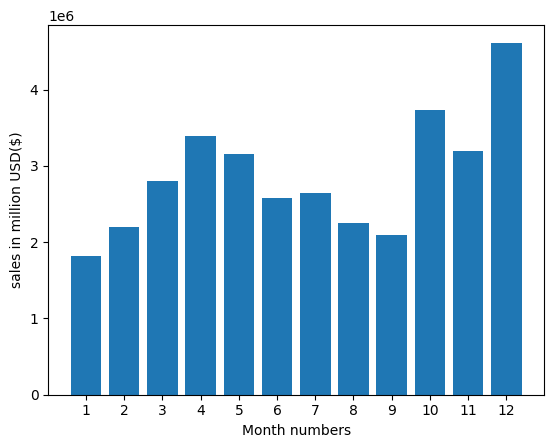

In [44]:
import matplotlib.pyplot as plt
plt.bar(months,results)
plt.xticks(months)
plt.ylabel('sales in million USD($)')
plt.xlabel('Month numbers')
plt.show()

In [46]:
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### city column

In [48]:
full_data['city'] = full_data['Purchase Address'].apply(lambda x: x.split(',')[1])
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [53]:
full_data.drop('city', axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [55]:
# to split 
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

full_data['city']=full_data['Purchase Address'].apply(lambda x: get_city(x) +' '+ '(' + get_state(x) + ')')
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [60]:
full_data.to_csv('ndf.csv', index=False)


### Q.2 What city have a highest number of sales?

In [56]:
new = full_data.groupby('city')['Sales'].sum()
new

city
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

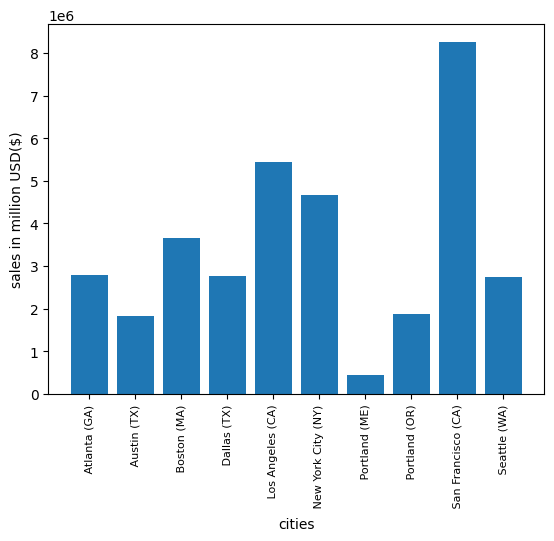

In [59]:
import matplotlib.pyplot as plt
cities= [city for city, df in full_data.groupby('city')]
plt.bar(cities,new)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('sales in million USD($)')
plt.xlabel('cities')
plt.show()

### Q.3 What time should we display advertisements to maximaze the likelihood of the customer's buying product?

In [ ]:
full_data.info()

In [65]:
full_data['Hour']=full_data['Order Date'].dt.hour
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [66]:
full_data['minute']=full_data['Order Date'].dt.minute
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


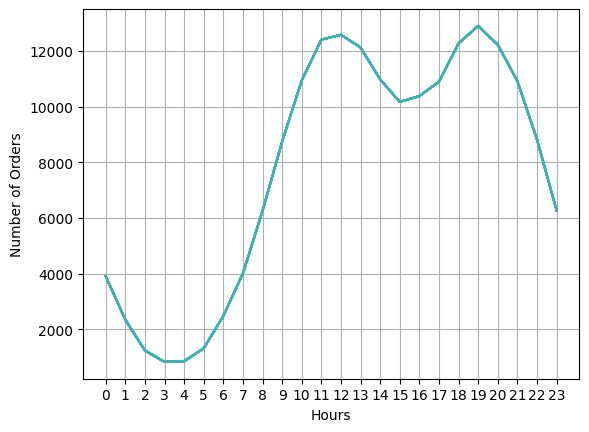

In [76]:
hours = [hour for hour, df in full_data.groupby('Hour')]

plt.plot(hours, full_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


In [74]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   city              185950 non-null  object        
 9   Hour              185950 non-null  int32         
 10  minute            185950 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(4)
memory usage: 14.2+ MB


In [77]:
full_data.to_csv('ndf.csv', index=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ndf=pd.read_csv("C:/Users/Pawan/Desktop/pyhton/ndf.csv")

In [5]:
ndf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### Q.4 What products are most often sold together?

In [10]:
df=ndf[ndf['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )

df=df[['Order ID','Grouped']].drop_duplicates()

df.head(50)

C:\Users\Pawan\AppData\Local\Temp\ipykernel_10880\1176409425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [16]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q.5 What products sold the most? Why do you think it sold the most?

In [ ]:
ndf.head()

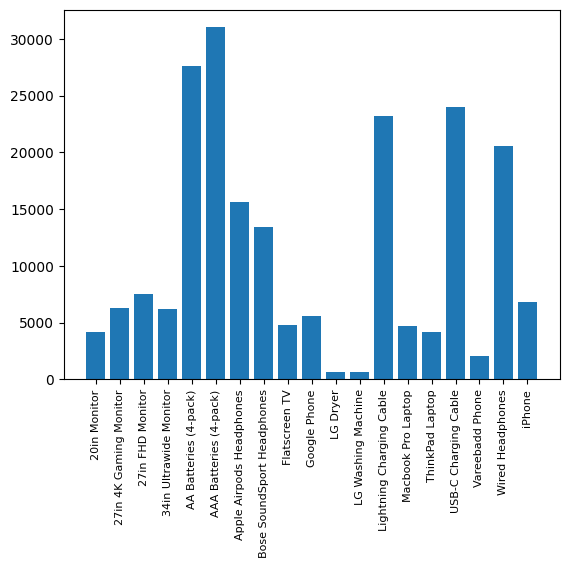

In [25]:
product_group=ndf.groupby('Product')
quantity=product_group.sum()['Quantity Ordered']

products=[product for product, df in product_group]

plt.bar(products, quantity)
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [28]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   city              185950 non-null  object 
 9   Hour              185950 non-null  int64  
 10  minute            185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [29]:
prices=ndf.groupby('Product')['Price Each'].mean()

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Pawan\AppData\Local\Temp\ipykernel_10880\3515132177.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


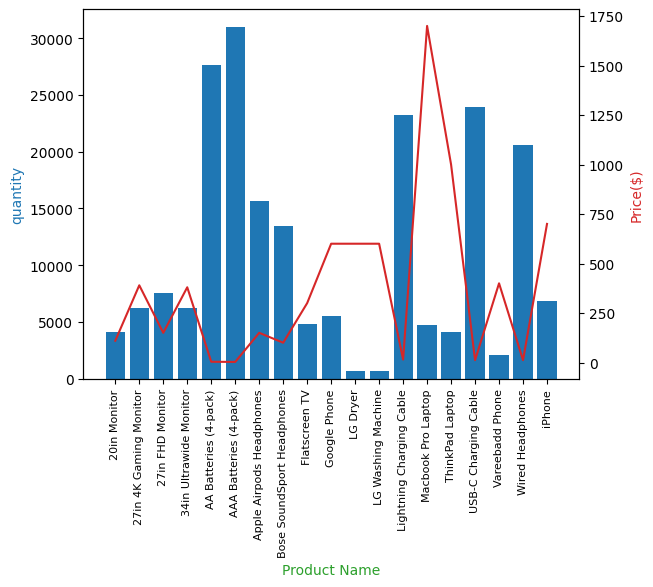

In [34]:
prices=ndf.groupby('Product')['Price Each'].mean()

# Create the first plot
fig, ax1 = plt.subplots()

# Plot the first set of data on the primary y-axis
ax1.bar(products, quantity, color='tab:blue')
ax1.set_ylabel('quantity', color='tab:blue')
ax1.set_xlabel('Product Name', color='tab:green')

# Create the second plot sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second set of data on the secondary y-axis
ax2.plot(products, prices, color='tab:red')
ax2.set_ylabel('Price($)', color='tab:red')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()